In [1]:
import numpy as np

In [3]:
print(np.arange(1,10,3))

[1 4 7]


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def f(x, y, vx, vy, t):
    """dx/dt"""
    return vx

def g(x, y, vx, vy, t):
    """dy/dt"""
    return vy

def h(x, y, vx, vy, t):
    """dvx/dt"""
    return -(vx**2+vy**2)/(x**2 + y**2)*x

def k(x, y, vx, vy, t):
    """dvy/dt"""
    return -(vx**2+vy**2)/(x**2 + y**2)*y

In [7]:
help(k)

Help on function k in module __main__:

k(x, y, vx, vy, t)
    dvy/dt



In [8]:
xpoints = []
ypoints = []
vxpoints = []
vypoints = []

# initial values
x = 1
y = 0
vx = 0
vy = 1

t0 = 0
t1 = 50
dt = .01

tpoints = np.arange(t0, t1, dt)

In [9]:
for t in tpoints:
    xpoints.append(x)
    ypoints.append(y)
    vxpoints.append(vx)
    vypoints.append(vy)
    
    x_k1 = dt*f(x, y, vx, vy, t)
    y_k1 = dt*g(x, y, vx, vy, t)
    vx_k1 = dt*h(x, y, vx, vy, t)
    vy_k1 = dt*k(x, y, vx, vy, t)
    
    x_k2 = dt*f(
        x + 0.5*x_k1,
        y, 
        vx,
        vy,
        t+0.5*dt)
    
    y_k2 = dt*g(
        x,
        y + 0.5*y_k1, 
        vx,
        vy,
        t+0.5*dt)
    
    vx_k2 = dt*h(
        x,
        y, 
        vx + 0.5*vx_k1,
        vy,
        t+0.5*dt)
    
    vy_k2 = dt*k(
        x,
        y, 
        vx,
        vy + 0.5*vy_k1,
        t+0.5*dt)
    
    x += x_k2
    y += y_k2
    vx += vx_k2
    vy += vy_k2

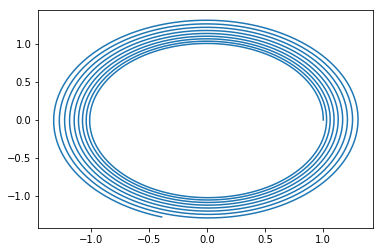

In [10]:

plt.plot(xpoints, ypoints)
plt.show()

In [17]:
X = np.linspace(1,3,3)
Y = np.linspace(1,3,3)

mesh = np.meshgrid(X, Y)

In [18]:
print(mesh)

[array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]]), array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])]


In [28]:
xpoints = []
ypoints = []
vxpoints = []
vypoints = []

# initial values
x = 1
y = 0
vx = 0
vy = 1

t0 = 0
t1 = 50
dt = .01

tpoints = np.arange(t0, t1, dt)

x_half = x + 0.5*dt*f(x, y, vx, vy, t0 + 0.5*dt)
y_half = y + 0.5*dt*g(x, y, vx, vy, t0 + 0.5*dt)
vx_half = vx + 0.5*dt*h(x, y, vx, vy, t0 + 0.5*dt)
vy_half = vy + 0.5*dt*k(x, y, vx, vy, t0 + 0.5*dt)

for t in tpoints:
    xpoints.append(x)
    ypoints.append(y)
    vxpoints.append(vx)
    vypoints.append(vy)
    
    x += dt*f(x_half, y_half, vx_half, vy_half, t+0.5*dt)
    y += dt*g(x_half, y_half, vx_half, vy_half, t+0.5*dt)
    vx += dt*h(x_half, y_half, vx_half, vy_half, t+0.5*dt)
    vy += dt*k(x_half, y_half, vx_half, vy_half, t+0.5*dt)
    
    x_half += dt*f(x, y, vx, vy, t+dt)
    y_half += dt*g(x, y, vx, vy, t+dt)
    vx_half += dt*h(x, y, vx, vy, t+dt)
    vy_half += dt*k(x, y, vx, vy, t+dt)

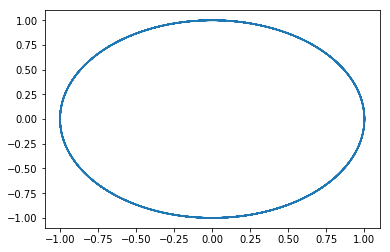

In [29]:
plt.plot(xpoints, ypoints)
plt.show()

In [25]:
r = np.array(xpoints)**2 + np.array(ypoints)**2

In [27]:
print(np.sqrt(r))

[ 1.          1.00005     1.0001     ... 77.24265157 77.24223059
 77.24180923]
